### Pandas ile Veri Kaynakların Bağlanma
* read_ ile başlayanlar okuyoruz. to_ ile başyanlarla yazıyoruz.

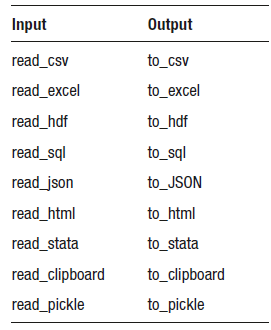

In [1]:
# Yas kolonundan önce boşluk var.
# Veli öncesi bir satır boş geçilmiz.
# Tarih kolonu var.
# ondlaık ayracı , olan bir değer var
# boş geçilmiş alanlar var
# boş geçilmiş alanar için Yok ifadesi kullanışmış.

metin = '''
Ad|Soyad| Yas|Tarih|Kilo
Abdullah|Kise|80|2021-09-24|70,2
Ali|Uçan|55|2021-09-23|

Veli|Kaçan|30|Yok|Yok
'''

In [3]:
import io
print(io.StringIO(metin).read()) #metinleri bufferlıyor(memory stream)


Ad|Soyad| Yas|Tarih|Kilo
Abdullah|Kise|80|2021-09-24|70,2
Ali|Uçan|55|2021-09-23|

Veli|Kaçan|30|Yok|Yok



### Pandas ile CSV okuma

In [4]:
import numpy as np
import pandas as pd

In [7]:
pd.read_csv(io.StringIO(metin),
           #delimiter="|"
            sep="|"
           )

,Ad,Soyad,Yas,Tarih,Kilo
0,Abdullah,Kise,80,2021-09-24,"70,2"
1,Ali,Uçan,55,2021-09-23,NaN
2,Veli,Kaçan,30,Yok,Yok


In [28]:
df = pd.read_csv(io.StringIO(metin), delimiter="|",
                #usecols=["Ad","Soyad"], #istediğimiz kolonlar
                 
                 #---
                 #usecols=["Ad","Yas"],
                 #skipinitialspace=True, #kolon adlarındaki boşluklar görmezden gelinir.
                 #----
                 
                 #skiprows=1,
                 #skipfooter=1
                 
                 #skip_blank_lines=False,
                 na_values={"Yok"}, #Yok ifadesi None olacak.
                 decimal = ",",
                 index_col=["Ad"], #index etiketi
                 parse_dates=["Tarih"],
                 dtype={
                            "Ad":str,
                            "Soyad":str,
                            " Yas":np.int8,
                            "Kilo":np.float16                     
                         }
                )

#---
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Abdullah to Veli
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Soyad   3 non-null      object        
 1    Yas    3 non-null      int8          
 2   Tarih   2 non-null      datetime64[ns]
 3   Kilo    1 non-null      float16       
dtypes: datetime64[ns](1), float16(1), int8(1), object(1)
memory usage: 81.0+ bytes


#### to_csv ile yazalım

In [32]:
import os

os.makedirs("databases", exist_ok=True) #klasorı oluşturacak

In [33]:
df.to_csv("databases/kisiler.csv")

#### converter
* belirtilen kolonda verilen fonksiyonu çalıştırır. (applymap, appyle, map)
* veri temizliği için kullanılabilir. (okurken temizlik yapabiliriz.)

In [35]:
pd.read_csv("databases/kisiler.csv",
           converters={"Soyad":str.upper} #soyad kolonundaki değerl str.upper fonkisyonuna parametre olarak gelir.
           )

,Ad,Soyad,Yas,Tarih,Kilo
0,Abdullah,KISE,80,2021-09-24,70.2
1,Ali,UÇAN,55,2021-09-23,NaN
2,Veli,KAÇAN,30,NaN,NaN


In [40]:
#Soru:
#soyadları düzeltelim. "Uçan":"Uçanlar", "Kaçan":"Kaçanoğulları"
temizlikKurali = {"Uçan":"Uçanlar", "Kaçan":"Kaçanoğulları"}

pd.read_csv("databases/kisiler.csv",
           converters = {"Soyad":lambda v: temizlikKurali[v] if temizlikKurali.get(v) else v}
           )

,Ad,Soyad,Yas,Tarih,Kilo
0,Abdullah,Kise,80,2021-09-24,70.2
1,Ali,Uçanlar,55,2021-09-23,NaN
2,Veli,Kaçanoğulları,30,NaN,NaN
